# Exercise 5.3 – Simulation of a Geometric Brownian Motion

We consider a **Geometric Brownian Motion (GBM)** process $P_t$ defined by the stochastic differential equation:

$$
\frac{dP_t}{P_t} = \mu\,dt + \sigma\,dW_t
$$

where $(W_t)_{t \geq 0}$ is a standard Brownian motion. The process models the evolution of an asset price under continuous compounding. We assume the following parameters:
- $P_0 = 100$
- $\mu = 0.04$ (expected return of 4%)
- $\sigma = 0.2$ (volatility of 20%)

---

## (a) Euler Discretization of the GBM

To simulate a sample path of $P_t$ over the interval $[0, T]$, we use the **Euler discretization scheme** with step size $\Delta = T/N$. The approximated values at time steps $t_i$ for $i = 1, 2, \dots, N$ are given by:

$$
P_{t_i} = P_{t_{i-1}} \left( 1 + \mu\,\Delta + \sigma\,\sqrt{\Delta}\,\varphi_i \right)
$$

where $\varphi_i \sim \mathcal{N}(0, 1)$ are independent standard normal random variables.

Simulate a single sample path of the process using:
- $T = 10$
- $N = 2500$

In the following parts of the exercise, we will analyze the simulated path of $P_t$.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(33)

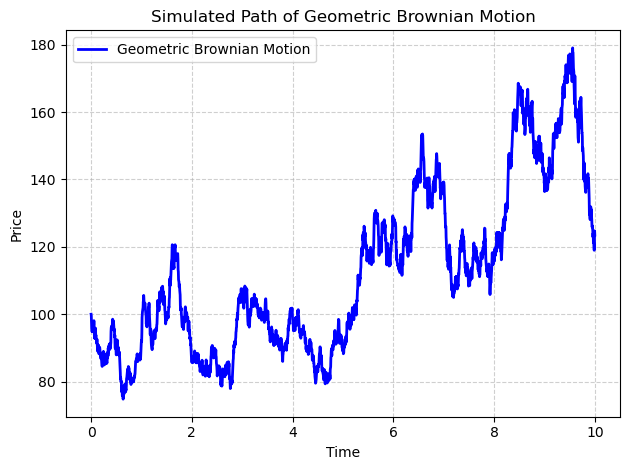

In [2]:
def GeometricBM(
        P0:float,
        mu:float,
        sigma:float,
        T:float,
        n:int
) -> np.array:
    path = np.zeros(n+1)
    path[0] = P0
    delta = T / n
    for i in range(1,n+1):
        Z = np.random.standard_normal()
        path[i] = path[i-1] * (1 + mu * delta + sigma * np.sqrt(delta) * Z)
    return path

T = 10
n = 2500
geoBM = GeometricBM(P0=100, mu=0.04, sigma=0.2, T=T, n=n)
time_grid = np.linspace(0, T, n + 1)

plt.plot(time_grid, geoBM, color='blue', lw=2, label='Geometric Brownian Motion')
plt.title('Simulated Path of Geometric Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


---
## (b) Log Returns and Visualization

The **log returns** $R_{t_i}$ of the geometric Brownian motion are defined as:

$$
R_{t_i} = \log\left(\frac{P_{t_i}}{P_{t_{i-1}}}\right), \quad i = 1, 2, \dots, N
$$

where $P_{t_i}$ are the simulated price levels at times $t_i$.

### Tasks:

- Compute the log returns from the simulated price path.
- Plot the price levels $P_t$ and the corresponding log returns $R_t$ in the same figure using two subplots for comparison.

This visualization helps understand the behavior of the price and its relative changes over time.


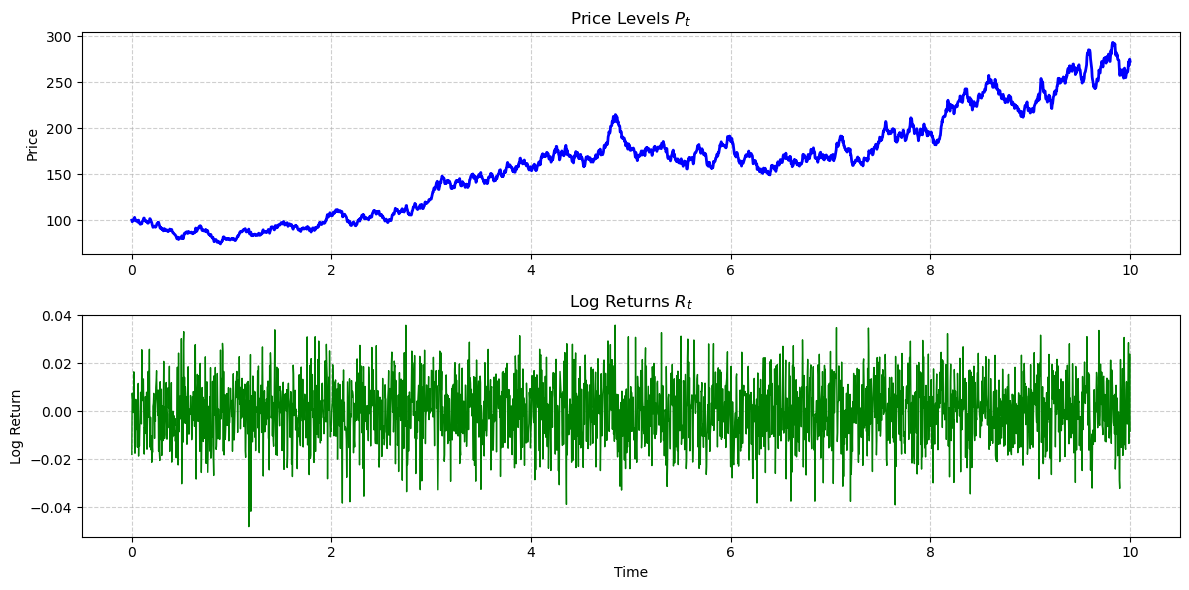

In [3]:
T = 10
n = 2500
P = GeometricBM(P0=100, mu=0.04, sigma=0.2, T=T, n=n)
logreturns = np.zeros(n)
for i in range(n):
    logreturns[i] = np.log(P[i+1] / P[i])

time_grid_prices = np.linspace(0, T, n + 1)
time_grid_returns = np.linspace(0, T, n)

plt.figure(figsize=(12, 6))

# Plot price levels
plt.subplot(2, 1, 1)
plt.plot(time_grid_prices, P, color='blue', lw=2)
plt.title('Price Levels $P_t$')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.6)

# Plot log returns
plt.subplot(2, 1, 2)
plt.plot(time_grid_returns, logreturns, color='green', lw=1)
plt.title('Log Returns $R_t$')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


---

## (c) Empirical Moments of Log Returns

We want to analyze the statistical properties of the simulated log returns $ R_{t_i} $, for $ i = 1, 2, \ldots, N $.

Specifically, compute the following empirical moments:

- **Mean** (1st moment):  
  $$
  \mu = \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N X_i
  $$

- **Volatility** (standard deviation):  
  $$
  \sigma = \sqrt{\mathbb{E}[(X - \mu)^2]} = \sqrt{\frac{1}{N} \sum_{i=1}^N (X_i - \mu)^2}
  $$

- **Skewness** (3rd standardized moment):  
  $$
  \text{Skewness} = \frac{\mathbb{E}[(X - \mu)^3]}{\sigma^3} = \frac{\frac{1}{N} \sum_{i=1}^N (X_i - \mu)^3}{\sigma^3}
  $$

- **Kurtosis** (4th standardized moment):  
  $$
  \text{Kurtosis} = \frac{\mathbb{E}[(X - \mu)^4]}{\sigma^4} = \frac{\frac{1}{N} \sum_{i=1}^N (X_i - \mu)^4}{\sigma^4}
  $$


In [4]:
mean = np.mean(logreturns)
sigma = np.std(logreturns)
skewness = np.mean((logreturns-mean)**3) / (sigma ** 3)
kurtosis = np.mean((logreturns-mean)**4) / (sigma ** 4)

data = {
    'Moment': ['Mean', 'Volatility', 'Skewness', 'Kurtosis'],
    'Value': [mean, sigma, skewness, kurtosis]
}
df = pd.DataFrame(data)
df

,Moment,Value
0,Mean,0.000402
1,Volatility,0.012857
2,Skewness,-0.118769
3,Kurtosis,2.871759


---

## (d) Investigating the Empirical Distribution of Standardized Log Returns

To assess the normality of the log returns, we compute the **standardized log returns** defined as:

$$
A_{t_i} = \frac{R_{t_i} - \hat{\mu} \, \Delta}{\hat{\sigma} \, \sqrt{\Delta}}, \quad \text{for } i = 1, 2, \dots, N
$$

where:

- $ R_{t_i} $ are the log returns,
- $ \hat{\mu} $ is the empirical mean of the log returns,
- $ \hat{\sigma} $ is the empirical standard deviation,
- $ \Delta = \frac{T}{N} $ is the time step size.

---

### Task:

Visualize the empirical distribution of the standardized log returns:

- Plot the histogram of $ A_{t_i} $ and overlay the standard normal density.
- Create a normal Q-Q plot to compare the quantiles of the standardized log returns with those of a standard normal distribution.

These plots help assess whether the standardized log returns follow a normal distribution, as expected in the geometric Brownian motion framework.


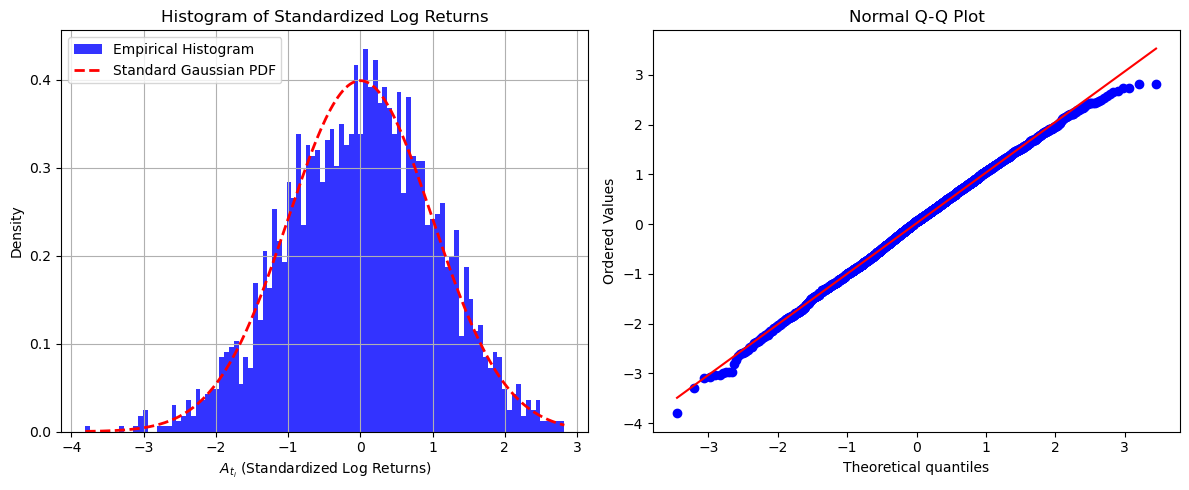

In [5]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

T = 10
n = 2500
delta = T / n
mu=0.04
sigma=0.2

# Standardize log returns (mean 0, std 1)
A = (logreturns - mu * delta) / (sigma * np.sqrt(delta))

plt.figure(figsize=(12, 5))

# Histogram + PDF plot
plt.subplot(1, 2, 1)
plt.hist(A, bins=100, density=True, alpha=0.8, color='blue', label='Empirical Histogram')
x_vals = np.linspace(min(A), max(A), 200)
plt.plot(x_vals, stats.norm.pdf(x_vals), 'r--', linewidth=2, label='Standard Gaussian PDF')
plt.title('Histogram of Standardized Log Returns')
plt.xlabel('$A_{t_i}$ (Standardized Log Returns)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(A, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')

plt.tight_layout()
plt.show()
